In [363]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import scispacy

import sqlite3
from sqlalchemy import create_engine 
from nltk.tokenize import word_tokenize, sent_tokenize



In [127]:
###con = sqlite3.connect("geo.db") 


In [128]:
###name_list = ['geo_0_10000', "geo_10000_10000", "geo_20000_10000", "geo_30000_10000", 
###             "geo_40000_10000", "geo_50000_10000", "geo_60000_10000", "geo_70000_10000", 
###             "geo_80000_10000", "geo_90000_10000", "geo_100000_10000"]
###def read_sql(name_list):
###    df = pd.DataFrame()
###    for i in name_list:
###        df_temp = pd.read_sql(f'SELECT * from {i}', con)
###        df_temp.sort_values(['Abstract'], inplace = True)
###        df_temp.drop_duplicates(subset=['Abstract'], inplace = True) 
###        df = pd.concat([df, df_temp])
###    return df
###df_total = read_sql(name_list)

In [379]:
# SQLAlchemy connectable

cnx = create_engine('sqlite:///geo.db').connect()
df = pd.read_sql_table('geo_0_200000', cnx)

In [380]:

df.sort_values(['Abstract'], inplace = True)
df.drop_duplicates(subset=['Abstract'], inplace = True)
mask = [i > 500 for i in [len(i) for i in df.Abstract]]
df = df[mask]
df.shape

(2828, 4)

In [385]:
doc_word.toarray().shape

(2828, 2075)

In [134]:
##pattern = re.compile(r"COVID|covid")
##for n, i in enumerate(df2.Abstract.dropna()):
##    if len(pattern.findall(i)) > 1:
##        print(n)

In [114]:
##def keep_token(t):
##    return (t.is_alpha and 
##            not (t.is_space or t.is_punct or 
##                 t.is_stop or t.like_num))

In [3]:
##def clean_text(text):
##    clean_text1 = re.sub('/', ' ', text)
##    clean_text2 = re.sub('\w*\d\w*', ' ', clean_text1)
##    clean_text3 = re.sub('[)(]|\-$', ' ', clean_text2)
##    clean_text4 = re.sub('- $|^-|-$', '', clean_text3)
##    return clean_text4

In [7]:
import scispacy
import spacy

#nlp = spacy.load("en_core_sci_sm")
#nlp = spacy.load("en_core_sci_md")
nlp = spacy.load("en_ner_bionlp13cg_md")


In [8]:
def clean_text(text):
    clean_text = re.sub('/', ' ', text)
    clean_text2 = re.sub('\w*\d\w*', ' ', clean_text)
    return clean_text2
    

def clean_word(word):
    word = re.sub('[)(]|\-$', ' ',word)
    word = re.sub('- $|^-|-$', '', word)
    return word



def clean_lemmatize_join_ent(doc):
    clean_t = [t.lemma_.strip().lower().replace(" ", "_") for t in doc]
    clean_t2 = " ".join(clean_t)
    
    return clean_t2


def clean_lemmatize_join_token(doc):
    clean_t = [t.lemma_.strip().lower() for t in doc.ents]
    clean_t2= []
    for i in clean_t:
        if len(re.split(" ", i)) == 1 and (len(str(i)) > 1):
            clean_t2.append(clean_word(i))
        else:
             for j in re.split(" ", i):
                if (len(str(j)) > 1):
                    clean_t2.append(clean_word(j))

    clean_t3 = " ".join(clean_t2)
    return clean_t3

In [9]:
##news3 = news2.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
##import CleanTextUtils as ctU
clean_abstract = df.Abstract.map(lambda x: clean_text(x))
tokenized_abstract = nlp.pipe(clean_abstract)

In [ ]:
#doc_ents = []
#for n, i in enumerate(tokenized_abstract):
#    doc_ents.append(ctU.clean_lemmatize_join_ent(i))
#    if n%100==0:
#        print(n)

In [10]:
docs = []
for n, i in enumerate(tokenized_abstract):
    docs.append(clean_lemmatize_join_token(i))
    if n%100==0:
        print(n)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


In [11]:
df.Abstract.iloc[100]

'Adrenal glands are the major organs releasing catecholamines and regulating our stress response. The mechanisms balancing generation of adrenergic chromaffin cells and protecting against neuroblastoma tumors are still enigmatic. Here we revealed that serotonin (5HT) controls the numbers of chromaffin cells by acting upon their immediate progenitor "bridge" cells via 5-hydroxytryptamine receptor 3A (HTR3A), and the aggressive HTR3Ahigh human neuroblastoma cell lines reduce proliferation in response to HTR3A-specific agonists. In embryos (in vivo), the physiological increase of 5HT caused a prolongation of the cell cycle in "bridge" progenitors leading to a smaller chromaffin population and changing the balance of hormones and behavioral patterns in adulthood. These behavioral effects and smaller adrenals were mirrored in the progeny of pregnant female mice subjected to experimental stress, suggesting a maternal-fetal link that controls developmental adaptations. Finally, these results 

In [12]:
docs[100]

'adrenal gland organ catecholamine adrenergic chromaffin cell neuroblastoma tumor serotonin chromaffin cell progenitor cell human neuroblastoma cell line embryo cell progenitor chromaffin adrenal mouse adrenal'

In [13]:
##with open('doc_ents.pkl', 'wb') as f:
##    pickle.dump(doc_ents, f)
##with open('docs.pkl', 'wb') as f:
##    pickle.dump(docs, f)

In [14]:
##with open('docs.pkl', 'rb') as f:
##    docs = pickle.load(f)

In [235]:
inertias = []
for k in np.arange(1, 80, 5):
    km = KMeans(n_clusters=k)
    km.fit(doc_topic_matrix)
    inertias.append(km.inertia_)

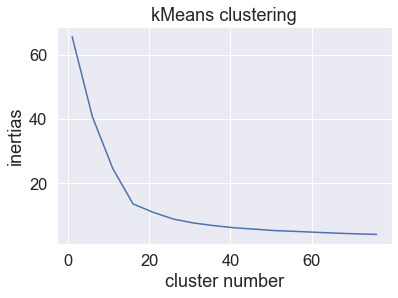

In [386]:
plt.plot(np.arange(1, 80, 5), inertias)
plt.xlabel('cluster number')
plt.ylabel("inertias")
plt.title('kMeans clustering')
plt.savefig('Image/inertias.jpg',  bbox_inches='tight')

In [397]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans


additional_stop_words = ['patient', 'human', 'dna', 'cell', 'cancer', 'tumor', 'cellular', 'copyright', 'line', 'mouse', 'tissue', 'sample', 'blood']

def vectorizeText(inputText):
    cv = CountVectorizer(stop_words = additional_stop_words)
    doc_word_matrix = cv.fit_transform(inputText)
    
    return cv, doc_word_matrix

def vectorizeTextIDF(inputText):
    cv_tfidf = TfidfVectorizer(stop_words = additional_stop_words, min_df = 0.001, max_df = 0.75)
    doc_word_tfidf_matrix = cv_tfidf.fit_transform(inputText)
    
    return cv_tfidf, doc_word_tfidf_matrix

def doNMF(numTopics, doc_word_matrix, vectorizer, no_top_words):
    nmf_model = NMF(numTopics)
    nmf_model.fit(doc_word_matrix)
    topic_word_matrix = nmf_model.components_.round(3)
    
    words = vectorizer.get_feature_names()

    doc_topic_matrix = nmf_model.fit_transform(doc_word_matrix)
    top_word_each_topic = []
    
    for n, topic in enumerate(topic_word_matrix):
        top_word = [words[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        top_word_each_topic.append(", ".join(top_word))
        print("\nTopic ", n + 1)
        print(", ".join(top_word))
    print("\n")

    return doc_topic_matrix, topic_word_matrix, top_word_each_topic



def doLSA(numTopics, doc_word_matrix, vectorizer, no_top_words):
    lsa_model = TruncatedSVD(numTopics)
    lsa_model.fit(doc_word_matrix)
    topic_word_matrix = lsa_model.components_.round(3)
    
    words = vectorizer.get_feature_names()

    doc_topic_matrix = lsa_model.fit_transform(doc_word_matrix)
    top_word_each_topic = []
    
    for n, topic in enumerate(topic_word_matrix):
        top_word = [words[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        top_word_each_topic.append(", ".join(top_word))
        print("\nTopic ", n + 1)
        print(", ".join(top_word))
    print("\n")
         

    return doc_topic_matrix, topic_word_matrix, top_word_each_topic


def dokMeans(numClusters, doc_word_matrix, vectorizer, no_top_words):

    
    
    km = KMeans(n_clusters=numClusters, random_state=425)
    doc_clusters = km.fit_predict(doc_word_matrix)

    ordered_cluster = km.cluster_centers_
    words = vectorizer.get_feature_names()
    
    top_word_kMeans = []
        
    for n, topic in enumerate(ordered_cluster):
        top_word = [words[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        top_word_kMeans.append(", ".join(top_word))
        print("\nTopic ", n + 1)
        print(", ".join(top_word))
    print("\n")
         
        
    return doc_clusters, ordered_cluster, top_word_kMeans


    
def show_doc_in_cluster(doc_word_matrix, docs, doc_clusters, ordered_cluster, topic_no):
    
    cluster_center = ordered_cluster[topic_no]
    labels = list(doc_clusters)
    label_of_interest = [label == topic_no for label in labels]
###    doc_in_cluster = doc_topic_matrix[label_of_interest]
    
    n_list =[]
    dists = []

def show_doc_in_cluster(doc_word_matrix, docs, doc_clusters, ordered_cluster, topic_no):
    
    cluster_center = ordered_cluster[topic_no]
    labels = list(doc_clusters)
    label_of_interest = [label == topic_no for label in labels]
###    doc_in_cluster = doc_topic_matrix[label_of_interest]
    
    n_list =[]
    dists = []
    dists2 = []
    for n, i in enumerate(doc_word_matrix):
        if label_of_interest[n]:
            dist = (np.dot(i, cluster_center)/np.linalg.norm(i)/np.linalg.norm(cluster_center), n)
            dists.append(dist)
            dist2 = (np.dot(i, cluster_center)/np.linalg.norm(i)/np.linalg.norm(cluster_center))
            if math.isnan(dist2):
                dists2.append(0)
            else:
                dists2.append(dist2)
            
        
    index_min_dist = [i[1] for i in sorted(dists)][:3]

    
    return index_min_dist, [docs[i] for i in index_min_dist]
    ##return dists2

In [399]:
show_doc_in_cluster(doc_word.toarray(), docs, doc_clusters, ordered_cluster, 8)

([1305, 2689, 456],
 ['liver cancer stem cell lcsc cell self-renewal hepatocellular carcinoma hcc lcsc lcsc spheroid culture alanine-glyoxylate aminotransferase agxt serine glycine spheroid culture lcsc agxt hcc cell spheroid lcsc agxt lcsc spheroid lcsc cancer lcsc agxt lcsc sry-box cancer agxt lcsc',
  'tumour lineage tumour cell cellular tumour cell tumour hepatocellular carcinoma cancer testis antigen cta hcc cell activin receptor-like kinase lysine tumour lineage hcc',
  'hepatocellular carcinoma hcc tissue section hepatocyte hepatitis virus tumoral non-tumoral tissue patient tumor non-tumoral tissue non-transformed cell tumor er-golgi hcc'])

In [324]:
df_box_plot = pd.DataFrame()
for i in range(15):
    a = show_doc_in_cluster(doc_word.toarray(), docs, doc_clusters, ordered_cluster, i)
    b =[f'{i}']*len(a)
    df = pd.DataFrame([b, a]).T
    df_box_plot = pd.concat([df_box_plot, df], axis = 0)


/var/folders/rg/kpn3fy794p9cgdns5sjmpzr80000gp/T/ipykernel_58640/2604154835.py:111: RuntimeWarning: invalid value encountered in double_scalars
  dist = (np.dot(i, cluster_center)/np.linalg.norm(i)/np.linalg.norm(cluster_center), n)
/var/folders/rg/kpn3fy794p9cgdns5sjmpzr80000gp/T/ipykernel_58640/2604154835.py:113: RuntimeWarning: invalid value encountered in double_scalars
  dist2 = (np.dot(i, cluster_center)/np.linalg.norm(i)/np.linalg.norm(cluster_center))


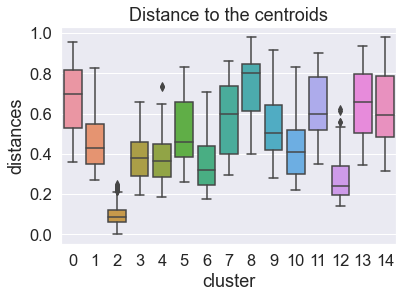

In [387]:

df2 = df_box_plot.copy()
df2.columns = ['cluster', 'distances']
df2['distances'] = df2['distances'].astype(float)
sns.set(font_scale =1.5)
p = sns.boxplot(x='cluster', y="distances", data =df2)
p.set_title("Distance to the centroids")
plt.savefig(f'Image/kMeans_distances.jpg',  bbox_inches='tight')

In [312]:
##from sklearn.preprocessing import StandardScaler
##std = StandardScaler()

##std.fit(doc_word.toarray())
##doc_word_std = std.transform(doc_word.toarray())




In [372]:
#doc_topic_matrix, topic_word_matrix, top_word_each_topic = doNMF(15, doc_word, cv, 2)


def show_doc_in_cluster_NMF(doc_topic_matrix, docs, topic_no):
    
    labels = [i.argsort()[:-1][0] for i in doc_topic_matrix]

    label_of_interest = [label == topic_no for label in labels]
###    doc_in_cluster = doc_topic_matrix[label_of_interest]
    doc_topic_matrix_topic = doc_topic_matrix[label_of_interest]
    
    
    
    dists = []
    dists2 = []
    for n, i in enumerate(doc_topic_matrix_topic):
        for m, j in enumerate(doc_topic_matrix_topic):
            if n != m:
                dist = (np.dot(i, j)/np.linalg.norm(i)/np.linalg.norm(j), (i, j))
                dists.append(dist)
                dist2 = (np.dot(i, j)/np.linalg.norm(i)/np.linalg.norm(j))
                if math.isnan(dist2):
                    dists2.append(0)
                else:
                    dists2.append(dist2)

            
        
    #index_min_dist = [i[1:3] for i in sorted(dists)][:3]

    
    ##return index_min_dist, [docs[i] for i in index_min_dist], dist2
    return dists2

In [377]:
df_box_plotNMF = pd.DataFrame()
for i in range(15):
    a = show_doc_in_cluster_NMF(doc_topic_matrix, docs, i)
    b =[f'{i}']*len(a)
    df_NMF = pd.DataFrame([b, a]).T
    df_box_plotNMF = pd.concat([df_box_plotNMF, df_NMF], axis = 0)

/var/folders/rg/kpn3fy794p9cgdns5sjmpzr80000gp/T/ipykernel_58640/1792214062.py:19: RuntimeWarning: invalid value encountered in double_scalars
  dist = (np.dot(i, j)/np.linalg.norm(i)/np.linalg.norm(j), (i, j))
/var/folders/rg/kpn3fy794p9cgdns5sjmpzr80000gp/T/ipykernel_58640/1792214062.py:21: RuntimeWarning: invalid value encountered in double_scalars
  dist2 = (np.dot(i, j)/np.linalg.norm(i)/np.linalg.norm(j))


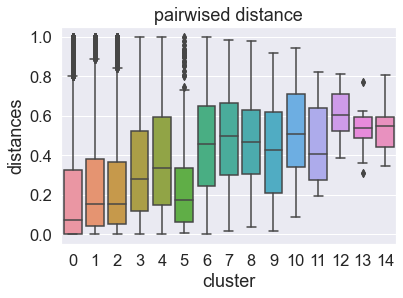

In [388]:
df3 = df_box_plotNMF.copy()
df3.columns = ['cluster', 'distances']
df3['distances'] = df3['distances'].astype(float)
sns.set(font_scale =1.5)
p = sns.boxplot(x='cluster', y="distances", data =df3)
p.set_title("pairwised distance")
plt.savefig(f'Image/NMF_distances.jpg',  bbox_inches='tight')

In [49]:
cv, doc_word = vectorizeTextIDF(docs)


In [246]:

doc_clusters, ordered_cluster, top_word_kMeans = dokMeans(15, doc_word, cv, 2)

doc_topic_matrix, topic_word_matrix, top_word_each_topic = doNMF(15, doc_word, cv, 2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topic  1
crc, colorectal

Topic  2
kidney, renal

Topic  3
stem, epithelial

Topic  4
chromatin, aml

Topic  5
liver, pdac

Topic  6
breast, tnbc

Topic  7
macrophage, monocyte

Topic  8
gbm, glioblastoma

Topic  9
hcc, hepatocellular

Topic  10
mitochondrial, mitochondria

Topic  11
lung, covid

Topic  12
ec, endothelial

Topic  13
il, brain

Topic  14
melanoma, braf

Topic  15
mir, pten



Topic  1
lung, epithelial

Topic  2
mir, exosome

Topic  3
breast, er

Topic  4
chromatin, histone

Topic  5
hcc, hepatocellular

Topic  6
stem, pluripotent

Topic  7
aml, leukemia

Topic  8
macrophage, monocyte

Topic  9
covid, coronavirus

Topic  10
crc, colorectal

Topic  11
liver, hepatic

Topic  12
gbm, brain

Topic  13
il, skin

Topic  14
melanoma, braf

Topic  15
mitochondrial, muscle




/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [392]:
def df_append_result(df, doc_topic_matrix, name='NMF'):
    
    labels = [i.argsort()[:-1][0] for i in doc_topic_matrix]
    df2 = df.copy()
    df2[f"{name}"] = labels  
    
    return df2

def df_append_result_kMeans(df, doc_clusters, name='kMeans'):
    labels = list(doc_clusters)
    df2 = df.copy()
    df2[f"{name}"] = labels  
    
    return df2

In [41]:
#df_append_result = df_append_result_kMeans(df, doc_clusters)
#doc_clusters, ordered_cluster, top_word_kMeans = dokMeans(9, doc_word, cv, 5)
#doc_topic_matrix, topic_word_matrix, top_word_each_topic = doNMF(9, doc_word, cv, 8)




In [389]:


import seaborn as sns
def getCounts(df, top_word_each_topic, name):

    unique_topic_values = df[name].sort_values().unique()
    
  
  
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(x = name, data=df.sort_values(by=name))
    
    ax.set_xticklabels(top_word_each_topic, rotation = 90, fontsize = 14)
    
    if name == 'NMF':
        plt.title("NMF topic modeling", fontsize = 14)
        plt.xlabel("Abstract Topic", fontsize = 14)
        plt.ylabel("Number of abstract", fontsize = 14)
        
        
    else:
        plt.title("kMeans abstract clustering", fontsize = 14)
        plt.xlabel("Abstract Topic", fontsize = 14)
        plt.ylabel("Number of abstract", fontsize = 14)

    fig.savefig(f'Image/{name}.jpg',  bbox_inches='tight')    
    plt.show()
    


In [326]:
doc_topic_matrix

array([[0.00115083, 0.00059774, 0.00556813, ..., 0.00059517, 0.00492954,
        0.00062461],
       [0.        , 0.34627524, 0.        , ..., 0.        , 0.        ,
        0.0041477 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.38245002,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00087153, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00253993, 0.00126941, ..., 0.00184917, 0.        ,
        0.00565879]])

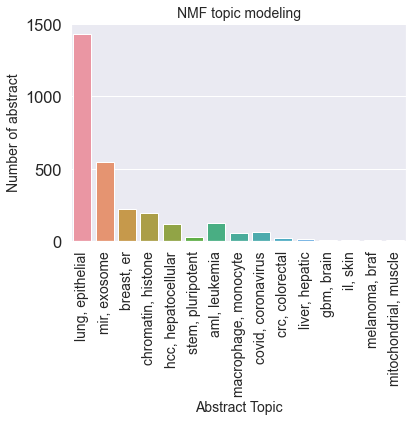

In [390]:
df_append_result_NMF = df_append_result(df, doc_topic_matrix, name='NMF')
#df_append_result_NMF2 = df_append_result_NMF[df_append_result_NMF['NMF_score'] >= 0.01]
getCounts(df_append_result_NMF, top_word_each_topic, 'NMF')  

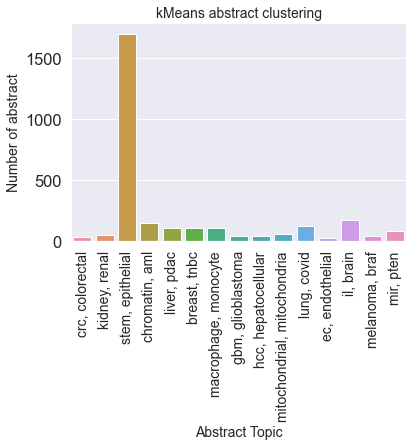

In [393]:
#df_append_result = df_append_result_kMeans(df, doc_clusters)
#doc_clusters, ordered_cluster, top_word_kMeans = dokMeans(9, doc_word, cv, 5)
#doc_topic_matrix, topic_word_matrix, top_word_each_topic = doNMF(9, doc_word, cv, 8)


df_append_result_kMeans = df_append_result_kMeans(df, doc_clusters)
getCounts(df_append_result_kMeans, top_word_kMeans, name = 'kMeans')  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2828 samples in 0.001s...
[t-SNE] Computed neighbors for 2828 samples in 0.240s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2828
[t-SNE] Computed conditional probabilities for sample 2000 / 2828
[t-SNE] Computed conditional probabilities for sample 2828 / 2828
[t-SNE] Mean sigma: 0.474041
[t-SNE] Computed conditional probabilities in 0.066s
[t-SNE] Iteration 50: error = 121.4051056, gradient norm = 0.0522655 (50 iterations in 0.494s)
[t-SNE] Iteration 100: error = 119.7046967, gradient norm = 0.0570213 (50 iterations in 0.542s)
[t-SNE] Iteration 150: error = 123.4730606, gradient norm = 0.0295842 (50 iterations in 0.594s)
[t-SNE] Iteration 200: error = 120.6472626, gradient norm = 0.1428306 (50 iterations in 0.592s)
[t-SNE] Iteration 250: error = 125.8609924, gradient norm = 0.0417746 (50 iterations in 0.599s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 125.860992
[t-SNE] Iteration 300

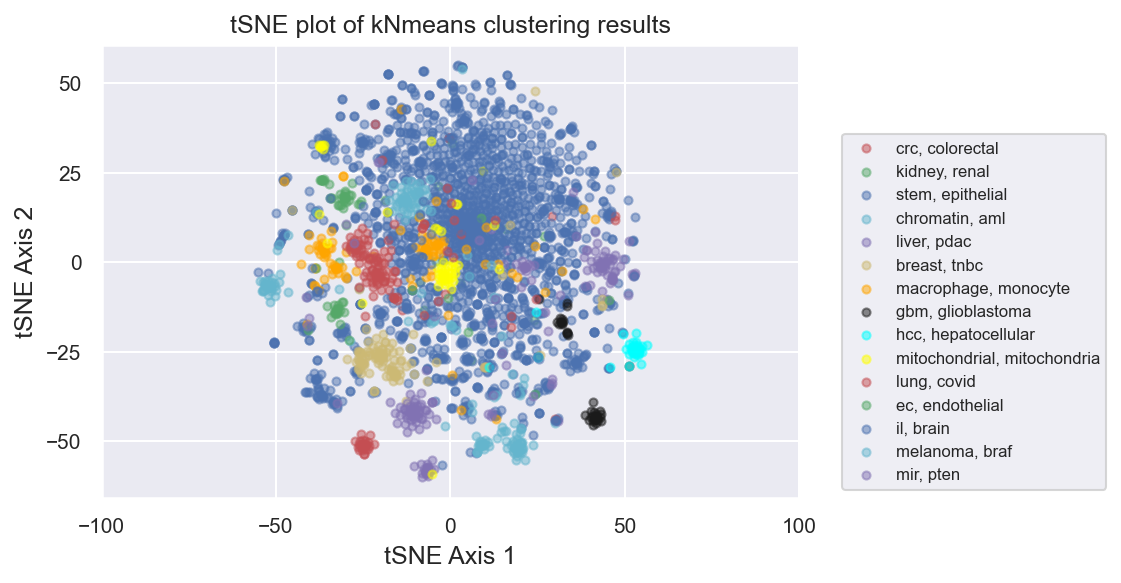

In [334]:
from sklearn.manifold import TSNE
from itertools import cycle
#df_append_result = df_append_result_kMeans(df, doc_clusters)
#doc_clusters, ordered_cluster, doc_clusters = dokMeans(9, doc_word, cv, 5)
#doc_topic_matrix, topic_word_matrix, top_word_each_topic = doNMF(9, doc_word, cv, 8)



model = TSNE(n_components=2, random_state=0,verbose=2)
low_data = model.fit_transform(doc_word)

target = doc_clusters
target_names = np.array(top_word_kMeans)

colors = cycle(['r','g','b','c','m','y','orange','k','aqua','yellow'])
target_ids = range(len(target_names))
plt.figure(dpi=150)
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(low_data[target == i, 0], low_data[target == i, 1], c=c, label=label, s=15, alpha=0.5)
plt.legend(fontsize=10, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);
plt.title("tSNE plot of kNmeans clustering results", fontsize=12)
plt.ylabel("tSNE Axis 2", fontsize=12)
plt.xlabel("tSNE Axis 1", fontsize=12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', fontsize = 8)
plt.savefig('Image/tSNE_kMeans.jpg',  bbox_inches='tight') ;

In [57]:
keep_abstract = doc_topic_matrix.sum(axis=1)!= 0
keep_abstract

array([ True,  True,  True, ...,  True,  True,  True])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2828 samples in 0.002s...
[t-SNE] Computed neighbors for 2828 samples in 0.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2828
[t-SNE] Computed conditional probabilities for sample 2000 / 2828
[t-SNE] Computed conditional probabilities for sample 2828 / 2828
[t-SNE] Mean sigma: 0.008642
[t-SNE] Computed conditional probabilities in 0.085s
[t-SNE] Iteration 50: error = 76.8377228, gradient norm = 0.0644919 (50 iterations in 0.467s)
[t-SNE] Iteration 100: error = 70.1565399, gradient norm = 0.0103926 (50 iterations in 0.308s)
[t-SNE] Iteration 150: error = 69.3772507, gradient norm = 0.0078254 (50 iterations in 0.297s)
[t-SNE] Iteration 200: error = 69.1668625, gradient norm = 0.0018702 (50 iterations in 0.328s)
[t-SNE] Iteration 250: error = 69.1142960, gradient norm = 0.0037304 (50 iterations in 0.339s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.114296
[t-SNE] Iteration 300: erro

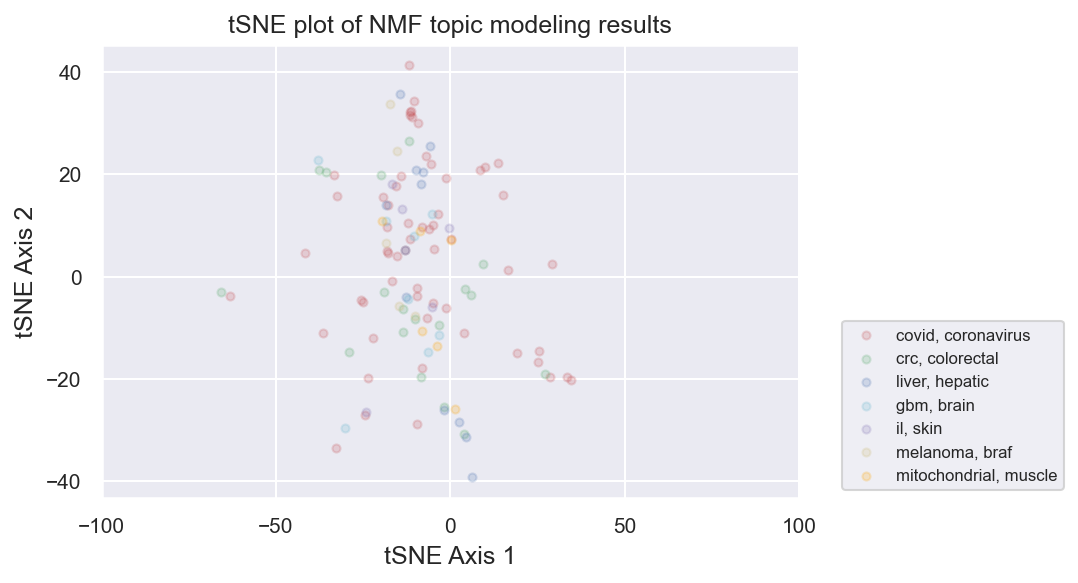

In [396]:
from sklearn.manifold import TSNE
from itertools import cycle
#df_append_result = df_append_result_kMeans(df, doc_clusters)
#doc_clusters, ordered_cluster, doc_clusters = dokMeans(9, doc_word, cv, 5)
#doc_topic_matrix, topic_word_matrix, top_word_each_topic = doNMF(9, doc_word, cv, 8)

distances = cosine_distances(doc_topic_matrix)



##high_data = doc_word
model = TSNE(n_components=2, random_state=0,verbose=2)
low_data = model.fit_transform(doc_topic_matrix)

target = np.array([i.argsort()[:-1][0] for i in doc_topic_matrix])
target_names = np.array(top_word_each_topic)

colors = cycle(['r','g','b','c','m','y','orange','k','aqua','yellow'])
target_ids = range(len(target_names))
plt.figure(dpi=150)
for i, c, label in zip(target_ids[8:], colors, target_names[8:]):
    plt.scatter(low_data[target == i, 0], low_data[target == i, 1], c=c, label=label, s=15, alpha=0.2)
plt.legend(fontsize=10, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);
plt.title("tSNE plot of NMF topic modeling results", fontsize=12)
plt.ylabel("tSNE Axis 2", fontsize=12)
plt.xlabel("tSNE Axis 1", fontsize=12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', fontsize = 8)
plt.savefig('Image/tSNE_NMF.jpg',  bbox_inches='tight') ;

In [78]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering
from itertools import cycle


def Mean_shift(doc_topic_matrix, quantile=0.2, n_samples=500):
    bandwidth = estimate_bandwidth(doc_topic_matrix, quantile=0.2, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(doc_topic_matrix)
    
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    
    plt.figure(dpi=200)
    colors = cycle('bcmgkr')
    for k, col in zip(range(n_clusters_), colors):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(doc_topic_matrix[my_members, 0], doc_topic_matrix[my_members, 1] ,  col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor='k', markeredgecolor='k', markersize=14)
    plt.title('Mean_shift_clustering (estimated number of clusters: %d)' % n_clusters_);
    
    return labels, cluster_centers

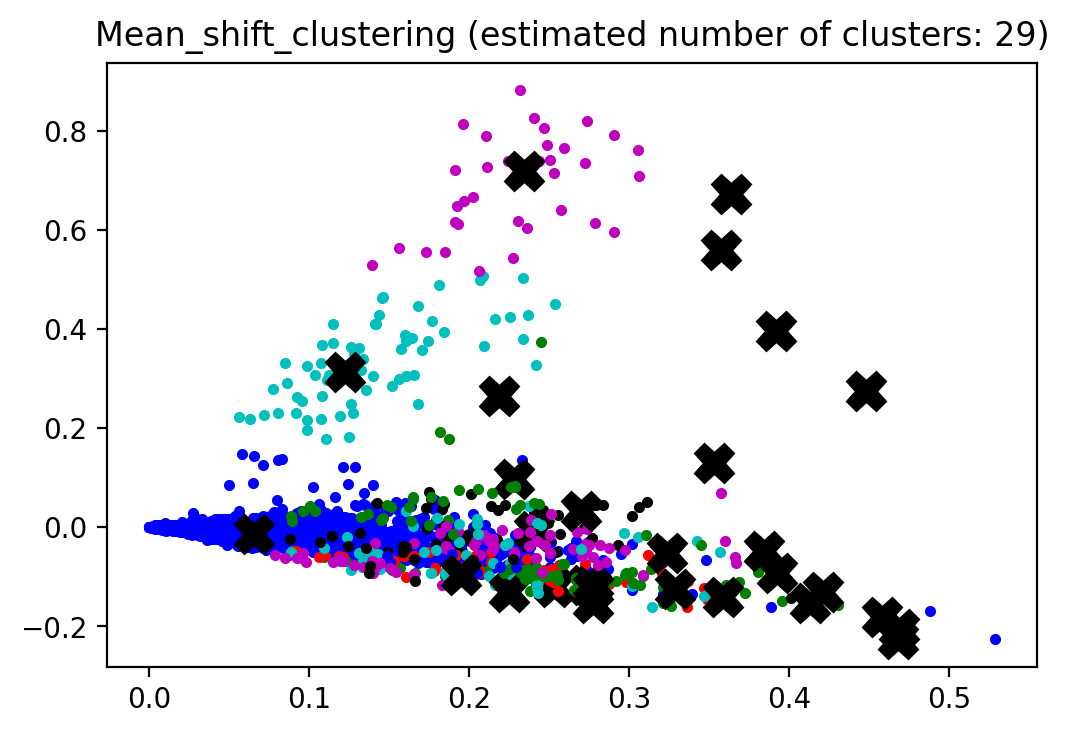

In [79]:
labels, cluster_centers = Mean_shift(doc_topic_matrix, quantile=0.2, n_samples=500)

In [ ]:
   
    
    

###nmf = NMF(5)
###nmf.fit(docs_vecs)

###topic_term = nmf.components_.round(3)

###topic_term_df = pd.DataFrame(topic_term.round(3),
###                index = ["component_1", "component_2", "component_3", "component_4", "component_5"],
###                columns = [i for i in docs_dict.values()])
    



In [191]:
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.matutils import sparse2full

In [192]:
###docs_dict = Dictionary(docs)
###docs_dict.filter_extremes(no_below=0, no_above=0)
###docs_dict.compactify()

###docs_corpus = [docs_dict.doc2bow(doc) for doc in docs]
###model_tfidf = TfidfModel(docs_corpus, id2word=docs_dict)
###docs_tfidf  = model_tfidf[docs_corpus]
###docs_vecs   = np.vstack([sparse2full(c, len(docs_dict)) for c in docs_tfidf])

###topic_term_df = pd.DataFrame(topic_term.round(3),
###                index = ["component_1", "component_2", "component_3", "component_4", "component_5"],
###                columns = [i for i in docs_dict.values()])

In [4]:
import spacy
import scispacy
import pickle
import numpy as np
import pandas as pd
import re
import en_ner_bionlp13cg_md
from sklearn.cluster import KMeans
from gensim.models import nmf
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.manifold import TSNE

In [30]:
nlp = en_ner_bionlp13cg_md.load()

In [56]:
doc = nlp.pipe(df.Abstract[:2])

In [61]:
docs = [i.ents for i in doc]

In [62]:
doc_dict = Dictionary([i.ents for i in docs])

In [63]:
docs_corpus = [doc_dict.doc2bow(doc) for doc in docs]

In [64]:
docs_corpus

[]

In [123]:
def lemmatize_doc(doc):
    return [t.lemma_ for t in doc]

docs = [lemmatize_doc(nlp(doc)) for doc in df.Abstract[:2]]

In [124]:
Dictionary(docs)

In [125]:
Dictionary.keys()

TypeError: keys() missing 1 required positional argument: 'self'